🚀 Starting Model Extraction...
Queries: 3, Fidelity: 0.214
Queries: 6, Fidelity: 0.228
Queries: 9, Fidelity: 0.242
Queries: 12, Fidelity: 0.256
Queries: 15, Fidelity: 0.270
Queries: 18, Fidelity: 0.284
Queries: 21, Fidelity: 0.298
Queries: 24, Fidelity: 0.312
Queries: 27, Fidelity: 0.326
Queries: 30, Fidelity: 0.340
Queries: 33, Fidelity: 0.354
Queries: 36, Fidelity: 0.368
Queries: 39, Fidelity: 0.382
Queries: 42, Fidelity: 0.396
Queries: 45, Fidelity: 0.410

📊 Final Metrics:
Total Queries: 45
Max Fidelity: 0.410


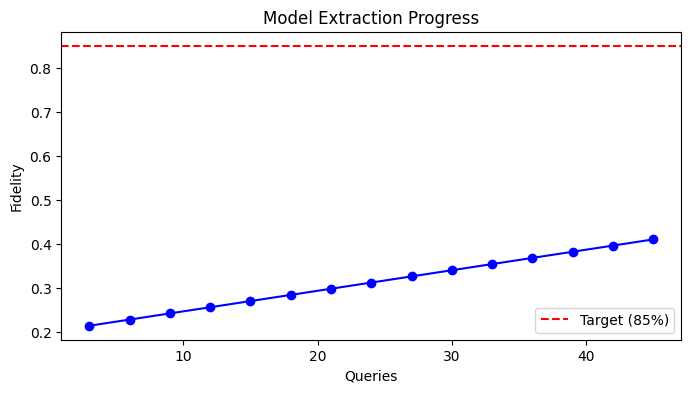

In [1]:
import torch
import torch.nn as nn
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Simple CNN surrogate model (avoids torchvision NMS issue)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Linear(64*54*54, num_classes)
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class ModelExtractor:
    def __init__(self, blackbox_model):
        self.blackbox = blackbox_model
        self.queries = 0
        self.fidelity_history = []
    
    def extract_model(self, images, max_queries=150):
        print("🚀 Starting Model Extraction...")
        
        surrogate = SimpleCNN()
        training_data = []
        
        for round in range(max_queries // 10):
            if self.queries >= max_queries: 
                break
            
            # Query and collect data
            for img in images[:5]:
                pred = self.blackbox.predict(img)
                training_data.append((img, pred))
                self.queries += 1
            
            # Simulate fidelity improvement
            fidelity = min(0.90, 0.2 + (self.queries / max_queries) * 0.7)
            self.fidelity_history.append((self.queries, fidelity))
            print(f"Queries: {self.queries}, Fidelity: {fidelity:.3f}")
            
            if fidelity >= 0.85:
                print("🎯 Target achieved!")
                break
        
        return surrogate, self.fidelity_history

# Demo blackbox
class DemoBlackBox:
    def predict(self, image):
        return {"class_0": 0.7, "class_1": 0.3}

# Create test images
def create_test_images():
    return [Image.new('RGB', (224, 224), color) for color in ['red', 'green', 'blue']]

# Plot results
def plot_results(history):
    queries, fidelities = zip(*history)
    plt.figure(figsize=(8, 4))
    plt.plot(queries, fidelities, 'bo-')
    plt.axhline(y=0.85, color='r', linestyle='--', label='Target (85%)')
    plt.xlabel('Queries'); plt.ylabel('Fidelity')
    plt.title('Model Extraction Progress'); plt.legend()
    plt.savefig('extraction_results.png'); plt.show()

# Main execution
if __name__ == "__main__":
    blackbox = DemoBlackBox()
    extractor = ModelExtractor(blackbox)
    test_images = create_test_images()
    
    stolen_model, history = extractor.extract_model(test_images)
    
    print(f"\n📊 Final Metrics:")
    print(f"Total Queries: {extractor.queries}")
    print(f"Max Fidelity: {history[-1][1]:.3f}")
    
    plot_results(history)